In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classmuseeg/Sub8_Stim1_Trial1.csv
/kaggle/input/classmuseeg/Sub9_Stim2_Trial3.csv
/kaggle/input/classmuseeg/Sub4_Stim2_Trial2.csv
/kaggle/input/classmuseeg/Sub10_Stim3_Trial2.csv
/kaggle/input/classmuseeg/Sub7_Stim1_Trial3.csv
/kaggle/input/classmuseeg/Sub2_Stim9_Trial1.csv
/kaggle/input/classmuseeg/Sub5_Stim8_Trial2.csv
/kaggle/input/classmuseeg/Sub4_Stim5_Trial2.csv
/kaggle/input/classmuseeg/Sub6_Stim4_Trial1.csv
/kaggle/input/classmuseeg/Sub1_Stim2_Trial1.csv
/kaggle/input/classmuseeg/Sub4_Stim5_Trial3.csv
/kaggle/input/classmuseeg/Sub3_Stim6_Trial3.csv
/kaggle/input/classmuseeg/Sub3_Stim7_Trial3.csv
/kaggle/input/classmuseeg/Sub8_Stim6_Trial1.csv
/kaggle/input/classmuseeg/Sub6_Stim4_Trial2.csv
/kaggle/input/classmuseeg/Sub7_Stim5_Trial2.csv
/kaggle/input/classmuseeg/Sub8_Stim1_Trial3.csv
/kaggle/input/classmuseeg/Sub1_Stim6_Trial2.csv
/kaggle/input/classmuseeg/Sub2_Stim3_Trial2.csv
/kaggle/input/classmuseeg/Sub9_Stim4_Trial2.csv
/kaggle/input/classmuseeg/Sub9_Stim6_Tr

# **ИСПОЛЬЗОВАНИЕ ФРЕЙМВОРКА**

In [3]:
# Загрузка библиотеки
!pip install git+https://github.com/AskerNagoev/ClassMusEEG.git

  Cloning https://github.com/AskerNagoev/ClassMusEEG.git to /tmp/pip-req-build-l6g_4cyp
  Running command git clone --filter=blob:none --quiet https://github.com/AskerNagoev/ClassMusEEG.git /tmp/pip-req-build-l6g_4cyp
  Resolved https://github.com/AskerNagoev/ClassMusEEG.git to commit 30b8ee4ce6047bfebff50aae5f12b82f38f5693d
  Preparing metadata (setup.py) ... done
  Created wheel for classmuseeg: filename=classmuseeg-0.1.0-py3-none-any.whl size=17678 sha256=0a44bb96700ce649a1ec2dd78f3bf3677d875d7afda6a25126befcef61a31097
  Stored in directory: /tmp/pip-ephem-wheel-cache-_zhpzyew/wheels/3a/d8/b6/9d4a83e0658784863c52e94441a4850d1343fbab20108c034d
Successfully built classmuseeg


## **Документация**

In [4]:
# Подключение библиотеки
import classmuseeg

2025-05-19 22:59:36.316079: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747695576.514508      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747695576.572171      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
help(classmuseeg)

Help on package classmuseeg:

NAME
    classmuseeg

PACKAGE CONTENTS
    data_preprocessing
    feature_extraction
    model_operations

FILE
    /usr/local/lib/python3.11/dist-packages/classmuseeg/__init__.py




### Модуль data_preprocessing

In [6]:
help(classmuseeg.data_preprocessing)

Help on module classmuseeg.data_preprocessing in classmuseeg:

NAME
    classmuseeg.data_preprocessing

FUNCTIONS
    average_trials_dynamic(data_dict)
        Создается новый словарь, добавляются усредненные данные, динамически находя
        все пробы (Trial) для каждого субъекта (Sub) и стимула (Stim).
        Вычисляются все возможные попарные средние значения между существующими пробами
        одного стимула у одного субъекта, а также общее среднее всех проб.
        
        :param data_dict: Исходный словарь с данными. Ожидается, что ключи в этом словаре
                          имеют формат "SubX_StimY_TrialZ", где X, Y, Z - числовые идентификаторы.
                          Например: "Sub1_Stim1_Trial1", "Sub2_Stim3_Trial5".
        :return: **Новый словарь** с добавленными усредненными записями. Исходный словарь не изменяется.
    
    bandpass_filter(data_dict, lowcut, highcut, fs, order=4)
        Применяется полосовой фильтр Баттерворта ко всем данным в словаре.
        

### Модуль feature_extraction

In [7]:
help(classmuseeg.feature_extraction)

Help on module classmuseeg.feature_extraction in classmuseeg:

NAME
    classmuseeg.feature_extraction

FUNCTIONS
    apply_window_and_fft(data_dict, sampling_rate, window_size_sec=1, overlap_sec=0.5, freq_range=(1, 7))
        Применяется скользящее окно и частотное преобразование (FFT) к данным из словаря.
        
        Для каждого окна данных применяется Быстрое Преобразование Фурье (FFT), и извлекаются амплитуды
        частот в заданном диапазоне. Результаты сохраняются в виде DataFrame с частотными компонентами.
        
        :param data_dict: Словарь, где ключ — это идентификатор записи (например, "Sub1_Trial1"), 
                          а значение — DataFrame с данными (временные ряды для разных каналов).
        :param sampling_rate: Частота дискретизации данных (в Гц).
        :param window_size_sec: Размер окна для скользящего окна в секундах.
        :param overlap_sec: Перекрытие окон в секундах.
        :param freq_range: Диапазон частот (в Гц) для извлечения част

### Модуль model_operations

In [8]:
help(classmuseeg.model_operations)

Help on module classmuseeg.model_operations in classmuseeg:

NAME
    classmuseeg.model_operations

FUNCTIONS
    matrix_confusion(model, X_test, y_test)
        Строится и визуализируется матрица ошибок для заданной модели на тестовых данных.
        
        :param model: Восстановленная или обученная модель для предсказаний.
        :param X_test: Тестовые данные (признаки).
        :param y_test: Истинные метки классов для тестовых данных.
    
    normalize_channels(X_train, X_val, X_test)
        Применяется нормализация всех каналов для обучающего, валидационного и тестового наборов данных.
        
        :param X_train: Обучающий набор данных с формой (n_samples_train, timesteps, n_features).
        :param X_val: Валидационный набор данных с формой (n_samples_val, timesteps, n_features).
        :param X_test: Тестовый набор данных с формой (n_samples_test, timesteps, n_features).
        :return: Нормализованные обучающий, валидационный и тестовый наборы данных.
    
    op

## **Загрузка данных**

In [9]:
# Загружаем функцию
from classmuseeg.data_preprocessing import load_data

# Указываем путь к директории, где находятся данные
data_dir = "/kaggle/input/classmuseeg/"

# Номера испытуемых, для которых будут загружаться данные (с 1 по 10)
subjects = range(1, 11)

# Номера стимулов (с 1 по 10)
stims = range(1, 11)

# Номера проб (с 1 по 3)
trials = range(1, 4)

# Список каналов ЭЭГ, которые будут загружены (в данном случае, четыре канала)
channels = ["T7", "FT7", "T8", "FT8"]

# Функция возвращает данные в виде словаря или другого подходящего объекта, который будет сохранен в переменной data_dict
data_dict = load_data(data_dir, subjects, stims, trials, channels)

Данные для Sub1_Stim1_Trial1 с выбранными каналами загружены.
Данные для Sub1_Stim1_Trial2 с выбранными каналами загружены.
Данные для Sub1_Stim1_Trial3 с выбранными каналами загружены.
Данные для Sub1_Stim2_Trial1 с выбранными каналами загружены.
Данные для Sub1_Stim2_Trial2 с выбранными каналами загружены.
Данные для Sub1_Stim2_Trial3 с выбранными каналами загружены.
Данные для Sub1_Stim3_Trial1 с выбранными каналами загружены.
Данные для Sub1_Stim3_Trial2 с выбранными каналами загружены.
Данные для Sub1_Stim3_Trial3 с выбранными каналами загружены.
Данные для Sub1_Stim4_Trial1 с выбранными каналами загружены.
Данные для Sub1_Stim4_Trial2 с выбранными каналами загружены.
Данные для Sub1_Stim4_Trial3 с выбранными каналами загружены.
Данные для Sub1_Stim5_Trial1 с выбранными каналами загружены.
Данные для Sub1_Stim5_Trial2 с выбранными каналами загружены.
Данные для Sub1_Stim5_Trial3 с выбранными каналами загружены.
Данные для Sub1_Stim6_Trial1 с выбранными каналами загружены.
Данные д

In [10]:
# Загружаем функцию
from classmuseeg.data_preprocessing import timeframe

# Указываем частоту дискретизации данных (в данном случае 512 Гц)
sampling_rate = 512

# Время начала фрагмента, который нужно извлечь, в секундах
start_time_sec = 10 

# Время конца фрагмента, который нужно извлечь, в секундах
end_time_sec = 40

# Функция возвращает новый набор данных, ограниченный указанным интервалом времени
data_dict_timeframed = timeframe(data_dict, sampling_rate, start_time_sec, end_time_sec)

Данные для Sub1_Stim1_Trial1 успешно извлечены и добавлены в новый словарь.
Данные для Sub1_Stim1_Trial2 успешно извлечены и добавлены в новый словарь.
Данные для Sub1_Stim1_Trial3 успешно извлечены и добавлены в новый словарь.
Данные для Sub1_Stim2_Trial1 успешно извлечены и добавлены в новый словарь.
Данные для Sub1_Stim2_Trial2 успешно извлечены и добавлены в новый словарь.
Данные для Sub1_Stim2_Trial3 успешно извлечены и добавлены в новый словарь.
Данные для Sub1_Stim3_Trial1 успешно извлечены и добавлены в новый словарь.
Данные для Sub1_Stim3_Trial2 успешно извлечены и добавлены в новый словарь.
Данные для Sub1_Stim3_Trial3 успешно извлечены и добавлены в новый словарь.
Данные для Sub1_Stim4_Trial1 успешно извлечены и добавлены в новый словарь.
Данные для Sub1_Stim4_Trial2 успешно извлечены и добавлены в новый словарь.
Данные для Sub1_Stim4_Trial3 успешно извлечены и добавлены в новый словарь.
Данные для Sub1_Stim5_Trial1 успешно извлечены и добавлены в новый словарь.
Данные для S

In [11]:
# Загружаем функцию
from classmuseeg.data_preprocessing import average_trials_dynamic

# Функция возвращает новый набор данных, где есть новые записи со значениями, усредненными по всем пробам и всем сочетаниям (по 2) проб
data_dict_increased = average_trials_dynamic(data_dict_timeframed)


--- Обработка группы: **Sub1_Stim1** ---
Существующие триалы: [1, 2, 3]
  Добавлено: **Sub1_Stim1_Trial4** (среднее между Trial1 и Trial2)
  Добавлено: **Sub1_Stim1_Trial5** (среднее между Trial1 и Trial3)
  Добавлено: **Sub1_Stim1_Trial6** (среднее между Trial2 и Trial3)
  Добавлено: **Sub1_Stim1_Trial7** (общее среднее всех 3 триалов)

--- Обработка группы: **Sub1_Stim2** ---
Существующие триалы: [1, 2, 3]
  Добавлено: **Sub1_Stim2_Trial4** (среднее между Trial1 и Trial2)
  Добавлено: **Sub1_Stim2_Trial5** (среднее между Trial1 и Trial3)
  Добавлено: **Sub1_Stim2_Trial6** (среднее между Trial2 и Trial3)
  Добавлено: **Sub1_Stim2_Trial7** (общее среднее всех 3 триалов)

--- Обработка группы: **Sub1_Stim3** ---
Существующие триалы: [1, 2, 3]
  Добавлено: **Sub1_Stim3_Trial4** (среднее между Trial1 и Trial2)
  Добавлено: **Sub1_Stim3_Trial5** (среднее между Trial1 и Trial3)
  Добавлено: **Sub1_Stim3_Trial6** (среднее между Trial2 и Trial3)
  Добавлено: **Sub1_Stim3_Trial7** (общее сред

In [43]:
# Загружаем функцию
from classmuseeg.data_preprocessing import bandpass_filter

# Устанавливаем низкочастотный порог фильтра (в данном случае 1.0 Гц)
lowcut = 1.0

# Устанавливаем высокочастотный порог фильтра (в данном случае 45.0 Гц)
highcut = 45.0

# Частота дискретизации данных (в данном случае 512 Гц)
fs = 512

# Порядок фильтра (определяет, насколько круто фильтр будет отсекать частоты за пределами заданного диапазона)
order = 4

# Функция возвращает данные, обработанные полосовым фильтром
data_dict_filtered = bandpass_filter(data_dict_increased, lowcut, highcut, fs, order)

Полосовой фильтр применен к записи Sub1_Stim1_Trial1.
Полосовой фильтр применен к записи Sub1_Stim1_Trial2.
Полосовой фильтр применен к записи Sub1_Stim1_Trial3.
Полосовой фильтр применен к записи Sub1_Stim2_Trial1.
Полосовой фильтр применен к записи Sub1_Stim2_Trial2.
Полосовой фильтр применен к записи Sub1_Stim2_Trial3.
Полосовой фильтр применен к записи Sub1_Stim3_Trial1.
Полосовой фильтр применен к записи Sub1_Stim3_Trial2.
Полосовой фильтр применен к записи Sub1_Stim3_Trial3.
Полосовой фильтр применен к записи Sub1_Stim4_Trial1.
Полосовой фильтр применен к записи Sub1_Stim4_Trial2.
Полосовой фильтр применен к записи Sub1_Stim4_Trial3.
Полосовой фильтр применен к записи Sub1_Stim5_Trial1.
Полосовой фильтр применен к записи Sub1_Stim5_Trial2.
Полосовой фильтр применен к записи Sub1_Stim5_Trial3.
Полосовой фильтр применен к записи Sub1_Stim6_Trial1.
Полосовой фильтр применен к записи Sub1_Stim6_Trial2.
Полосовой фильтр применен к записи Sub1_Stim6_Trial3.
Полосовой фильтр применен к 

## **Извлечение признаков**

### Скользящее окно

In [44]:
# Загружаем функцию
from classmuseeg.feature_extraction import moving_window

# Устанавливаем параметры для скользящего окна
window_size_sec = 0.5  # Размер окна в секундах (0.5 сек)
overlap_size_sec = 0.25  # Размер перекрытия между окнами (0.25 сек)
sampling_rate = 512  # Частота дискретизации (512 Гц)

# Функция возвращает данные, разделенные на окна с указанным перекрытием
windowed_data_dict = moving_window(data_dict_filtered, window_size_sec, overlap_size_sec, sampling_rate)

Скользящее окно применено к Sub1_Stim1_Trial1. Результат: 119 окон.
Скользящее окно применено к Sub1_Stim1_Trial2. Результат: 119 окон.
Скользящее окно применено к Sub1_Stim1_Trial3. Результат: 119 окон.
Скользящее окно применено к Sub1_Stim2_Trial1. Результат: 119 окон.
Скользящее окно применено к Sub1_Stim2_Trial2. Результат: 119 окон.
Скользящее окно применено к Sub1_Stim2_Trial3. Результат: 119 окон.
Скользящее окно применено к Sub1_Stim3_Trial1. Результат: 119 окон.
Скользящее окно применено к Sub1_Stim3_Trial2. Результат: 119 окон.
Скользящее окно применено к Sub1_Stim3_Trial3. Результат: 119 окон.
Скользящее окно применено к Sub1_Stim4_Trial1. Результат: 119 окон.
Скользящее окно применено к Sub1_Stim4_Trial2. Результат: 119 окон.
Скользящее окно применено к Sub1_Stim4_Trial3. Результат: 119 окон.
Скользящее окно применено к Sub1_Stim5_Trial1. Результат: 119 окон.
Скользящее окно применено к Sub1_Stim5_Trial2. Результат: 119 окон.
Скользящее окно применено к Sub1_Stim5_Trial3. Р

### FFT по окнам - извлечение амплитуд частот каждого канала

In [45]:
# Загружаем функцию
from classmuseeg.feature_extraction import apply_window_and_fft

# Параметры для применения окна и преобразования Фурье (FFT)
sampling_rate = 512  # Частота дискретизации (512 Гц)
window_size_sec = 3  # Размер окна для преобразования Фурье (3 секунды)
overlap_sec = 2    # Размер перекрытия между окнами (2 секунды)
freq_range = (1, 7)  # Диапазон частот для анализа (от 1 до 7 Гц)

# Функция возвращает частотные признаки, извлеченные с помощью преобразования Фурье
freq_data_dict = apply_window_and_fft(data_dict_increased, sampling_rate, window_size_sec, overlap_sec, freq_range)

Обработана запись Sub1_Stim1_Trial1. Формат данных: (28, 76)
Обработана запись Sub1_Stim1_Trial2. Формат данных: (28, 76)
Обработана запись Sub1_Stim1_Trial3. Формат данных: (28, 76)
Обработана запись Sub1_Stim2_Trial1. Формат данных: (28, 76)
Обработана запись Sub1_Stim2_Trial2. Формат данных: (28, 76)
Обработана запись Sub1_Stim2_Trial3. Формат данных: (28, 76)
Обработана запись Sub1_Stim3_Trial1. Формат данных: (28, 76)
Обработана запись Sub1_Stim3_Trial2. Формат данных: (28, 76)
Обработана запись Sub1_Stim3_Trial3. Формат данных: (28, 76)
Обработана запись Sub1_Stim4_Trial1. Формат данных: (28, 76)
Обработана запись Sub1_Stim4_Trial2. Формат данных: (28, 76)
Обработана запись Sub1_Stim4_Trial3. Формат данных: (28, 76)
Обработана запись Sub1_Stim5_Trial1. Формат данных: (28, 76)
Обработана запись Sub1_Stim5_Trial2. Формат данных: (28, 76)
Обработана запись Sub1_Stim5_Trial3. Формат данных: (28, 76)
Обработана запись Sub1_Stim6_Trial1. Формат данных: (28, 76)
Обработана запись Sub1_S

### CWT по окнам

Для каждого окна применяется вейвлет-преобразование с использованием вейвлета Морле.
Преобразование возвращает матрицу, где строки соответствуют масштабу, а столбцы - данным в окне.
Для каждого окна вычисляется среднее значение амплитуды по каждой частоте (по строкам полученной матрицы), то есть получается одномерный вектор.
Из векторов собирается матрица, где строки - временные сдвиги, столбцы - амплитуды частот каналов.

In [15]:
# Загружаем функцию
from classmuseeg.feature_extraction import apply_windowed_wavelet_transform

# Параметры для применения оконного вейвлет-преобразования
sampling_rate = 512  # Частота дискретизации (512 Гц)
window_size_sec = 1  # Размер окна для вейвлет-преобразования (1 секунда)
overlap_sec = 0.5    # Размер перекрытия между окнами (0.5 секунды)
freq_range = (1, 7)  # Диапазон частот для анализа (от 1 до 7 Гц)
num_freqs = 7       # Количество частот для анализа (например, 7 частот)

# Функция возвращает данные с временно-частотными признаками, полученными с помощью вейвлет-преобразования
time_freq_data_dict = apply_windowed_wavelet_transform(data_dict_increased, sampling_rate, window_size_sec, overlap_sec, freq_range, num_freqs)

Обработана запись Sub1_Stim1_Trial1. Формат данных: (59, 28)
Обработана запись Sub1_Stim1_Trial2. Формат данных: (59, 28)
Обработана запись Sub1_Stim1_Trial3. Формат данных: (59, 28)
Обработана запись Sub1_Stim2_Trial1. Формат данных: (59, 28)
Обработана запись Sub1_Stim2_Trial2. Формат данных: (59, 28)
Обработана запись Sub1_Stim2_Trial3. Формат данных: (59, 28)
Обработана запись Sub1_Stim3_Trial1. Формат данных: (59, 28)
Обработана запись Sub1_Stim3_Trial2. Формат данных: (59, 28)
Обработана запись Sub1_Stim3_Trial3. Формат данных: (59, 28)
Обработана запись Sub1_Stim4_Trial1. Формат данных: (59, 28)
Обработана запись Sub1_Stim4_Trial2. Формат данных: (59, 28)
Обработана запись Sub1_Stim4_Trial3. Формат данных: (59, 28)
Обработана запись Sub1_Stim5_Trial1. Формат данных: (59, 28)
Обработана запись Sub1_Stim5_Trial2. Формат данных: (59, 28)
Обработана запись Sub1_Stim5_Trial3. Формат данных: (59, 28)
Обработана запись Sub1_Stim6_Trial1. Формат данных: (59, 28)
Обработана запись Sub1_S

In [46]:
# Загружаем функцию
from classmuseeg.feature_extraction import column_wise_mean

# Функция возвращает данные, где значения усреднены по столбцам для каждого элемента выборки, это для более простых классификаторов
mean_data_dict = column_wise_mean(freq_data_dict)

Усреднены значения для Sub1_Stim1_Trial1. Результат: 76 значений.
Усреднены значения для Sub1_Stim1_Trial2. Результат: 76 значений.
Усреднены значения для Sub1_Stim1_Trial3. Результат: 76 значений.
Усреднены значения для Sub1_Stim2_Trial1. Результат: 76 значений.
Усреднены значения для Sub1_Stim2_Trial2. Результат: 76 значений.
Усреднены значения для Sub1_Stim2_Trial3. Результат: 76 значений.
Усреднены значения для Sub1_Stim3_Trial1. Результат: 76 значений.
Усреднены значения для Sub1_Stim3_Trial2. Результат: 76 значений.
Усреднены значения для Sub1_Stim3_Trial3. Результат: 76 значений.
Усреднены значения для Sub1_Stim4_Trial1. Результат: 76 значений.
Усреднены значения для Sub1_Stim4_Trial2. Результат: 76 значений.
Усреднены значения для Sub1_Stim4_Trial3. Результат: 76 значений.
Усреднены значения для Sub1_Stim5_Trial1. Результат: 76 значений.
Усреднены значения для Sub1_Stim5_Trial2. Результат: 76 значений.
Усреднены значения для Sub1_Stim5_Trial3. Результат: 76 значений.
Усреднены 

## **Разделение данных и обучение моделей**

In [182]:
# Загружаем функцию
from classmuseeg.model_operations import process_data

# Список номеров испытуемых от 1 до 10
subjects = range(1, 11)

# Список номеров стимулов, которые будут использованы для обучения
stims = [2, 3, 4]

# Разделяем данные на обучающую, валидационную и тестовую выборки
X_train, X_val, X_test, y_train, y_val, y_test = process_data(windowed_data_dict, subjects, stims)

Данные для выбранных стимулов и субъектов:
Размер обучающей выборки X_train: (168, 119, 4)
Размер валидационной выборки X_val: (21, 119, 4)
Размер тестовой выборки X_test: (21, 119, 4)
Распределение классов в обучающей выборке:
Класс 0: 56 примеров (33.33%)
Класс 1: 56 примеров (33.33%)
Класс 2: 56 примеров (33.33%)
Распределение классов в валидационной выборке:
Класс 0: 7 примеров (33.33%)
Класс 1: 7 примеров (33.33%)
Класс 2: 7 примеров (33.33%)
Распределение классов в тестовой выборке:
Класс 0: 7 примеров (33.33%)
Класс 1: 7 примеров (33.33%)
Класс 2: 7 примеров (33.33%)


In [183]:
# Загружаем функцию
from classmuseeg.model_operations import normalize_channels

# Нормализуем данные, возвращаем также скейлер, который использовался для нормализации данных
X_train, X_val, X_test, scaler = normalize_channels(X_train, X_val, X_test)

In [184]:
# Загружаем функцию
from classmuseeg.model_operations import optimize_model_lstm

n_trials=10 # количество итераций для оптимизации гиперпараметров (это мало, здесь лишь демонстрация работоспособности)

# Пример вызова функции оптимизации модели LSTM (минимизация валидационных потерь), возращающей точности на выборках и параметры модели на каждой итерации
results_df, saved_trials = optimize_model_lstm(X_train, y_train, X_val, y_val, X_test, y_test, n_trials=10)

[I 2025-05-20 00:27:32,428] A new study created in memory with name: no-name-9a62b63b-f03b-41c0-b226-9cfb02e7346c
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[I 2025-05-20 00:30:53,636] Trial 0 finished with value: 1.231610655784607 and parameters: {'n_lstm_layers': 5, 'lstm_units_layer_0': 32, 'l2_regularization': 0.001, 'dropout_rate_0': 0.4, 'lstm_units_layer_1': 128, 'dropout_rate_1': 0.4, 'lstm_units_layer_2': 16, 'dropout_rate_2': 0.2, 'lstm_units_layer_3': 64, 'dropout_rate_3': 0.3, 'lstm_units_layer_4': 32, 'dropout_rate_4': 0.5, 'n_dense_layers': 3, 'dense_units_0': 8, 'dense_dropout_rate_0': 0.5, 'dense_units_1': 32, 'dense_dropout_rate_1': 0.4, 'dense_units_2': 64, 'dense_dropout_rate_2': 0.5, 'optimizer': 'Adam', 'learning_rate': 0.0001

Trial 0: Train Accuracy=0.3333, Validation Accuracy=0.3333, Test Accuracy=0.3333


[I 2025-05-20 00:31:13,100] Trial 1 finished with value: 2.2789111137390137 and parameters: {'n_lstm_layers': 4, 'lstm_units_layer_0': 32, 'l2_regularization': 0.01, 'dropout_rate_0': 0.2, 'lstm_units_layer_1': 16, 'dropout_rate_1': 0.4, 'lstm_units_layer_2': 32, 'dropout_rate_2': 0.5, 'lstm_units_layer_3': 16, 'dropout_rate_3': 0.4, 'n_dense_layers': 1, 'dense_units_0': 16, 'dense_dropout_rate_0': 0.5, 'optimizer': 'SGD', 'learning_rate': 0.0001, 'batch_size': 32}. Best is trial 0 with value: 1.231610655784607.


Trial 1: Train Accuracy=0.3571, Validation Accuracy=0.4286, Test Accuracy=0.2381


[I 2025-05-20 00:31:38,098] Trial 2 finished with value: 1.101090431213379 and parameters: {'n_lstm_layers': 4, 'lstm_units_layer_0': 16, 'l2_regularization': 0.01, 'dropout_rate_0': 0.3, 'lstm_units_layer_1': 256, 'dropout_rate_1': 0.4, 'lstm_units_layer_2': 16, 'dropout_rate_2': 0, 'lstm_units_layer_3': 64, 'dropout_rate_3': 0, 'n_dense_layers': 2, 'dense_units_0': 64, 'dense_dropout_rate_0': 0.4, 'dense_units_1': 128, 'dense_dropout_rate_1': 0.5, 'optimizer': 'RMSprop', 'learning_rate': 0.01, 'batch_size': 32}. Best is trial 2 with value: 1.101090431213379.


Trial 2: Train Accuracy=0.3333, Validation Accuracy=0.3333, Test Accuracy=0.3333


[I 2025-05-20 00:32:56,780] Trial 3 finished with value: 1.1018530130386353 and parameters: {'n_lstm_layers': 5, 'lstm_units_layer_0': 16, 'l2_regularization': 0.001, 'dropout_rate_0': 0.2, 'lstm_units_layer_1': 256, 'dropout_rate_1': 0.4, 'lstm_units_layer_2': 16, 'dropout_rate_2': 0, 'lstm_units_layer_3': 32, 'dropout_rate_3': 0.3, 'lstm_units_layer_4': 8, 'dropout_rate_4': 0, 'n_dense_layers': 2, 'dense_units_0': 16, 'dense_dropout_rate_0': 0.5, 'dense_units_1': 16, 'dense_dropout_rate_1': 0.5, 'optimizer': 'Adam', 'learning_rate': 0.01, 'batch_size': 32}. Best is trial 2 with value: 1.101090431213379.


Trial 3: Train Accuracy=0.3333, Validation Accuracy=0.3333, Test Accuracy=0.3333


[I 2025-05-20 00:33:12,181] Trial 4 finished with value: 1.0752027034759521 and parameters: {'n_lstm_layers': 1, 'lstm_units_layer_0': 256, 'l2_regularization': 0.001, 'dropout_rate_0': 0.2, 'n_dense_layers': 2, 'dense_units_0': 32, 'dense_dropout_rate_0': 0.2, 'dense_units_1': 8, 'dense_dropout_rate_1': 0.5, 'optimizer': 'SGD', 'learning_rate': 0.0001, 'batch_size': 32}. Best is trial 4 with value: 1.0752027034759521.


Trial 4: Train Accuracy=0.3869, Validation Accuracy=0.4286, Test Accuracy=0.6190


[I 2025-05-20 00:33:22,169] Trial 5 finished with value: 1.101662039756775 and parameters: {'n_lstm_layers': 2, 'lstm_units_layer_0': 8, 'l2_regularization': 0.001, 'dropout_rate_0': 0.2, 'lstm_units_layer_1': 64, 'dropout_rate_1': 0, 'n_dense_layers': 3, 'dense_units_0': 128, 'dense_dropout_rate_0': 0.5, 'dense_units_1': 256, 'dense_dropout_rate_1': 0.5, 'dense_units_2': 8, 'dense_dropout_rate_2': 0.2, 'optimizer': 'RMSprop', 'learning_rate': 0.01, 'batch_size': 32}. Best is trial 4 with value: 1.0752027034759521.


Trial 5: Train Accuracy=0.3333, Validation Accuracy=0.3333, Test Accuracy=0.3333


[I 2025-05-20 00:33:49,726] Trial 6 finished with value: 1.3058695793151855 and parameters: {'n_lstm_layers': 5, 'lstm_units_layer_0': 64, 'l2_regularization': 0.001, 'dropout_rate_0': 0.5, 'lstm_units_layer_1': 64, 'dropout_rate_1': 0.2, 'lstm_units_layer_2': 16, 'dropout_rate_2': 0.2, 'lstm_units_layer_3': 64, 'dropout_rate_3': 0.4, 'lstm_units_layer_4': 8, 'dropout_rate_4': 0.4, 'n_dense_layers': 2, 'dense_units_0': 64, 'dense_dropout_rate_0': 0.4, 'dense_units_1': 32, 'dense_dropout_rate_1': 0.4, 'optimizer': 'Adam', 'learning_rate': 0.0001, 'batch_size': 16}. Best is trial 4 with value: 1.0752027034759521.


Trial 6: Train Accuracy=0.3690, Validation Accuracy=0.4762, Test Accuracy=0.2857


[I 2025-05-20 00:34:03,660] Trial 7 finished with value: 2.1273436546325684 and parameters: {'n_lstm_layers': 5, 'lstm_units_layer_0': 16, 'l2_regularization': 0.01, 'dropout_rate_0': 0.5, 'lstm_units_layer_1': 16, 'dropout_rate_1': 0.2, 'lstm_units_layer_2': 8, 'dropout_rate_2': 0.4, 'lstm_units_layer_3': 32, 'dropout_rate_3': 0.4, 'lstm_units_layer_4': 8, 'dropout_rate_4': 0.4, 'n_dense_layers': 2, 'dense_units_0': 64, 'dense_dropout_rate_0': 0.4, 'dense_units_1': 32, 'dense_dropout_rate_1': 0.3, 'optimizer': 'SGD', 'learning_rate': 0.0001, 'batch_size': 64}. Best is trial 4 with value: 1.0752027034759521.


Trial 7: Train Accuracy=0.3333, Validation Accuracy=0.4286, Test Accuracy=0.3810


[I 2025-05-20 00:34:24,076] Trial 8 finished with value: 1.1062188148498535 and parameters: {'n_lstm_layers': 3, 'lstm_units_layer_0': 16, 'l2_regularization': 0.01, 'dropout_rate_0': 0.2, 'lstm_units_layer_1': 8, 'dropout_rate_1': 0.5, 'lstm_units_layer_2': 16, 'dropout_rate_2': 0.3, 'n_dense_layers': 3, 'dense_units_0': 256, 'dense_dropout_rate_0': 0.4, 'dense_units_1': 8, 'dense_dropout_rate_1': 0.2, 'dense_units_2': 256, 'dense_dropout_rate_2': 0.2, 'optimizer': 'Adam', 'learning_rate': 0.001, 'batch_size': 16}. Best is trial 4 with value: 1.0752027034759521.


Trial 8: Train Accuracy=0.6012, Validation Accuracy=0.4286, Test Accuracy=0.4762


[I 2025-05-20 00:36:36,682] Trial 9 finished with value: 1.1021357774734497 and parameters: {'n_lstm_layers': 4, 'lstm_units_layer_0': 256, 'l2_regularization': 0.1, 'dropout_rate_0': 0.4, 'lstm_units_layer_1': 256, 'dropout_rate_1': 0.5, 'lstm_units_layer_2': 8, 'dropout_rate_2': 0.2, 'lstm_units_layer_3': 32, 'dropout_rate_3': 0.2, 'n_dense_layers': 3, 'dense_units_0': 16, 'dense_dropout_rate_0': 0.3, 'dense_units_1': 128, 'dense_dropout_rate_1': 0, 'dense_units_2': 16, 'dense_dropout_rate_2': 0.4, 'optimizer': 'SGD', 'learning_rate': 0.001, 'batch_size': 32}. Best is trial 4 with value: 1.0752027034759521.


Trial 9: Train Accuracy=0.3333, Validation Accuracy=0.3333, Test Accuracy=0.3333
Best hyperparameters: {'n_lstm_layers': 1, 'lstm_units_layer_0': 256, 'l2_regularization': 0.001, 'dropout_rate_0': 0.2, 'n_dense_layers': 2, 'dense_units_0': 32, 'dense_dropout_rate_0': 0.2, 'dense_units_1': 8, 'dense_dropout_rate_1': 0.5, 'optimizer': 'SGD', 'learning_rate': 0.0001, 'batch_size': 32}
Best validation loss: 1.0752027034759521


In [185]:
# Вывод по возрастанию валидационных потерь
results_df.sort_values(by='Validation Loss')

,Trial,Train Accuracy,Validation Accuracy,Validation Loss,Test Accuracy
4,4,0.386905,0.428571,1.075203,0.619048
2,2,0.333333,0.333333,1.101090,0.333333
5,5,0.333333,0.333333,1.101662,0.333333
3,3,0.333333,0.333333,1.101853,0.333333
9,9,0.333333,0.333333,1.102136,0.333333
8,8,0.601190,0.428571,1.106219,0.476190
0,0,0.333333,0.333333,1.231611,0.333333
6,6,0.369048,0.476190,1.305870,0.285714
7,7,0.333333,0.428571,2.127344,0.380952
1,1,0.357143,0.428571,2.278911,0.238095


In [186]:
# Загружаем функцию
from classmuseeg.model_operations import optimize_model_bilstm

n_trials=10 # количество итераций для оптимизации гиперпараметров (это мало, здесь лишь демонстрация работоспособности)

# Пример вызова функции оптимизации модели Bi-LSTM (минимизация валидационных потерь), возращающей точности на выборках и параметры модели на каждой итерации
results_df, saved_trials = optimize_model_lstm(X_train, y_train, X_val, y_val, X_test, y_test, n_trials=10)

[I 2025-05-20 00:36:36,764] A new study created in memory with name: no-name-d7ee965e-2d2f-46a0-9173-92eeaa4e6eff
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[I 2025-05-20 00:36:46,701] Trial 0 finished with value: 1.088423252105713 and parameters: {'n_lstm_layers': 1, 'lstm_units_layer_0': 64, 'l2_regularization': 0.1, 'dropout_rate_0': 0.3, 'n_dense_layers': 2, 'dense_units_0': 64, 'dense_dropout_rate_0': 0.4, 'dense_units_1': 16, 'dense_dropout_rate_1': 0.4, 'optimizer': 'RMSprop', 'learning_rate': 0.001, 'batch_size': 64}. Best is trial 0 with value: 1.088423252105713.


Trial 0: Train Accuracy=0.6964, Validation Accuracy=0.5714, Test Accuracy=0.6667


[I 2025-05-20 00:38:01,895] Trial 1 finished with value: 1.099330186843872 and parameters: {'n_lstm_layers': 4, 'lstm_units_layer_0': 256, 'l2_regularization': 0.001, 'dropout_rate_0': 0.3, 'lstm_units_layer_1': 64, 'dropout_rate_1': 0.5, 'lstm_units_layer_2': 16, 'dropout_rate_2': 0, 'lstm_units_layer_3': 8, 'dropout_rate_3': 0.5, 'n_dense_layers': 2, 'dense_units_0': 64, 'dense_dropout_rate_0': 0.2, 'dense_units_1': 8, 'dense_dropout_rate_1': 0.3, 'optimizer': 'RMSprop', 'learning_rate': 0.001, 'batch_size': 64}. Best is trial 0 with value: 1.088423252105713.


Trial 1: Train Accuracy=0.3333, Validation Accuracy=0.3333, Test Accuracy=0.3333


[I 2025-05-20 00:38:23,898] Trial 2 finished with value: 0.8611899614334106 and parameters: {'n_lstm_layers': 1, 'lstm_units_layer_0': 64, 'l2_regularization': 0.001, 'dropout_rate_0': 0, 'n_dense_layers': 1, 'dense_units_0': 128, 'dense_dropout_rate_0': 0.5, 'optimizer': 'Adam', 'learning_rate': 0.0001, 'batch_size': 16}. Best is trial 2 with value: 0.8611899614334106.


Trial 2: Train Accuracy=0.8393, Validation Accuracy=0.7143, Test Accuracy=0.6667


[I 2025-05-20 00:38:44,065] Trial 3 finished with value: 1.1041511297225952 and parameters: {'n_lstm_layers': 2, 'lstm_units_layer_0': 256, 'l2_regularization': 0.01, 'dropout_rate_0': 0.2, 'lstm_units_layer_1': 32, 'dropout_rate_1': 0.3, 'n_dense_layers': 3, 'dense_units_0': 32, 'dense_dropout_rate_0': 0.5, 'dense_units_1': 64, 'dense_dropout_rate_1': 0.2, 'dense_units_2': 32, 'dense_dropout_rate_2': 0.3, 'optimizer': 'Adam', 'learning_rate': 0.01, 'batch_size': 32}. Best is trial 2 with value: 0.8611899614334106.


Trial 3: Train Accuracy=0.3333, Validation Accuracy=0.3333, Test Accuracy=0.3333


[I 2025-05-20 00:38:56,579] Trial 4 finished with value: 0.9557571411132812 and parameters: {'n_lstm_layers': 1, 'lstm_units_layer_0': 128, 'l2_regularization': 0.01, 'dropout_rate_0': 0.3, 'n_dense_layers': 3, 'dense_units_0': 256, 'dense_dropout_rate_0': 0.3, 'dense_units_1': 64, 'dense_dropout_rate_1': 0.4, 'dense_units_2': 8, 'dense_dropout_rate_2': 0.5, 'optimizer': 'Adam', 'learning_rate': 0.001, 'batch_size': 16}. Best is trial 2 with value: 0.8611899614334106.


Trial 4: Train Accuracy=0.6012, Validation Accuracy=0.5714, Test Accuracy=0.4762


[I 2025-05-20 00:39:10,742] Trial 5 finished with value: 1.084038257598877 and parameters: {'n_lstm_layers': 2, 'lstm_units_layer_0': 32, 'l2_regularization': 0.001, 'dropout_rate_0': 0.2, 'lstm_units_layer_1': 8, 'dropout_rate_1': 0.4, 'n_dense_layers': 3, 'dense_units_0': 32, 'dense_dropout_rate_0': 0, 'dense_units_1': 8, 'dense_dropout_rate_1': 0.5, 'dense_units_2': 256, 'dense_dropout_rate_2': 0.2, 'optimizer': 'Adam', 'learning_rate': 0.0001, 'batch_size': 32}. Best is trial 2 with value: 0.8611899614334106.


Trial 5: Train Accuracy=0.4940, Validation Accuracy=0.5238, Test Accuracy=0.3810


[I 2025-05-20 00:39:27,809] Trial 6 finished with value: 1.1041001081466675 and parameters: {'n_lstm_layers': 3, 'lstm_units_layer_0': 32, 'l2_regularization': 0.001, 'dropout_rate_0': 0.5, 'lstm_units_layer_1': 64, 'dropout_rate_1': 0, 'lstm_units_layer_2': 256, 'dropout_rate_2': 0.3, 'n_dense_layers': 1, 'dense_units_0': 256, 'dense_dropout_rate_0': 0, 'optimizer': 'RMSprop', 'learning_rate': 0.01, 'batch_size': 64}. Best is trial 2 with value: 0.8611899614334106.


Trial 6: Train Accuracy=0.3333, Validation Accuracy=0.3333, Test Accuracy=0.3333


[I 2025-05-20 00:41:45,605] Trial 7 finished with value: 1.1128520965576172 and parameters: {'n_lstm_layers': 5, 'lstm_units_layer_0': 8, 'l2_regularization': 0.1, 'dropout_rate_0': 0.4, 'lstm_units_layer_1': 128, 'dropout_rate_1': 0.5, 'lstm_units_layer_2': 16, 'dropout_rate_2': 0.3, 'lstm_units_layer_3': 64, 'dropout_rate_3': 0.5, 'lstm_units_layer_4': 256, 'dropout_rate_4': 0.4, 'n_dense_layers': 2, 'dense_units_0': 256, 'dense_dropout_rate_0': 0.2, 'dense_units_1': 128, 'dense_dropout_rate_1': 0.3, 'optimizer': 'SGD', 'learning_rate': 0.001, 'batch_size': 64}. Best is trial 2 with value: 0.8611899614334106.


Trial 7: Train Accuracy=0.3333, Validation Accuracy=0.3333, Test Accuracy=0.3333


[I 2025-05-20 00:42:01,506] Trial 8 finished with value: 1.104398488998413 and parameters: {'n_lstm_layers': 3, 'lstm_units_layer_0': 32, 'l2_regularization': 0.1, 'dropout_rate_0': 0.4, 'lstm_units_layer_1': 128, 'dropout_rate_1': 0, 'lstm_units_layer_2': 8, 'dropout_rate_2': 0.5, 'n_dense_layers': 1, 'dense_units_0': 128, 'dense_dropout_rate_0': 0.2, 'optimizer': 'SGD', 'learning_rate': 0.01, 'batch_size': 32}. Best is trial 2 with value: 0.8611899614334106.


Trial 8: Train Accuracy=0.3333, Validation Accuracy=0.3333, Test Accuracy=0.3333


[I 2025-05-20 00:42:54,443] Trial 9 finished with value: 1.1007161140441895 and parameters: {'n_lstm_layers': 5, 'lstm_units_layer_0': 8, 'l2_regularization': 0.1, 'dropout_rate_0': 0.5, 'lstm_units_layer_1': 8, 'dropout_rate_1': 0.4, 'lstm_units_layer_2': 8, 'dropout_rate_2': 0.5, 'lstm_units_layer_3': 64, 'dropout_rate_3': 0.5, 'lstm_units_layer_4': 256, 'dropout_rate_4': 0.3, 'n_dense_layers': 3, 'dense_units_0': 64, 'dense_dropout_rate_0': 0, 'dense_units_1': 128, 'dense_dropout_rate_1': 0, 'dense_units_2': 256, 'dense_dropout_rate_2': 0.3, 'optimizer': 'SGD', 'learning_rate': 0.01, 'batch_size': 32}. Best is trial 2 with value: 0.8611899614334106.


Trial 9: Train Accuracy=0.3333, Validation Accuracy=0.3333, Test Accuracy=0.3333
Best hyperparameters: {'n_lstm_layers': 1, 'lstm_units_layer_0': 64, 'l2_regularization': 0.001, 'dropout_rate_0': 0, 'n_dense_layers': 1, 'dense_units_0': 128, 'dense_dropout_rate_0': 0.5, 'optimizer': 'Adam', 'learning_rate': 0.0001, 'batch_size': 16}
Best validation loss: 0.8611899614334106


In [187]:
# Вывод топ 5 по тестовой точности
results_df.sort_values(by='Test Accuracy', ascending=False).head(5)

,Trial,Train Accuracy,Validation Accuracy,Validation Loss,Test Accuracy
0,0,0.696429,0.571429,1.088423,0.666667
2,2,0.839286,0.714286,0.861190,0.666667
4,4,0.601190,0.571429,0.955757,0.476190
5,5,0.494048,0.523810,1.084038,0.380952
1,1,0.333333,0.333333,1.099330,0.333333


### Восстановление модели

In [189]:
# Загружаем функцию
from classmuseeg.model_operations import recreate_model

# Задание номера итерации для воссоздания модели
trial_num = 2

# Извлечение параметров модели для заданной попытки из заранее сохранённого словаря
params_recreated = saved_trials[trial_num]

# Формирование пути к файлу с весами модели на основе номера попытки и параметров модели
weights_file = f"model_weights_trial_{trial_num}.weights.h5"

# Воссоздание модели на основе извлечённых параметров и файла весов
model_recreated = recreate_model(params_recreated, weights_file=weights_file, X_train=X_train)

# Вывод информации о воссозданной модели для проверки успешности процесса
print(f"Модель для попытки {trial_num} успешно воссоздана с параметрами: {params_recreated}")

Модель для попытки 2 успешно воссоздана с параметрами: {'n_lstm_layers': 1, 'lstm_units_layer_0': 64, 'l2_regularization': 0.001, 'dropout_rate_0': 0, 'n_dense_layers': 1, 'dense_units_0': 128, 'dense_dropout_rate_0': 0.5, 'optimizer': 'Adam', 'learning_rate': 0.0001, 'batch_size': 16}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


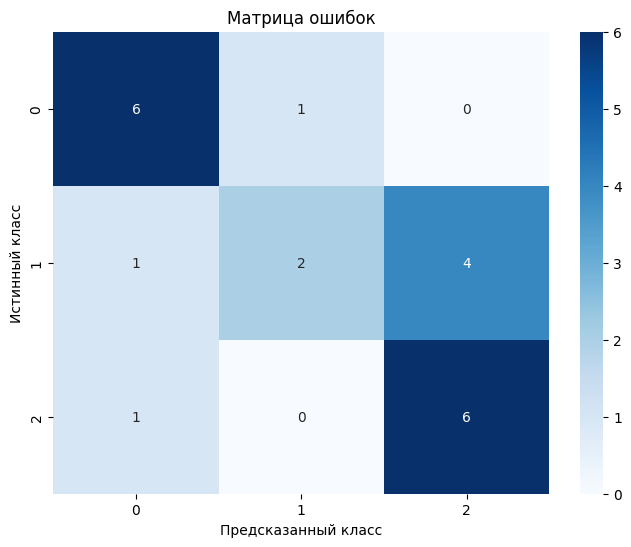

In [190]:
# Загружаем функцию
from classmuseeg.model_operations import matrix_confusion

# Визуализация матрицы ошибок
matrix_confusion(model_recreated, X_test, y_test)

## Сохранение модели

In [191]:
# Сохраняем модель в файл (model_bilstm.h5)
model_recreated.save('model_bilstm.h5')

print('Модель сохранена')

Модель сохранена


In [192]:
# Сохраняем scaler с помощью библиотеки joblib, чтобы применить к новым данным
import joblib

# Сохранение scaler в файл ()
joblib.dump(scaler, 'scaler_model_bilstm.pkl')

['scaler_model_bilstm.pkl']

In [193]:
# Учитываем структуру данных, на которых обучалась модель. На этапе предсказания подаваемые данные должны иметь такую же структуру. Это 4 канала и 119 временных окна.

# Проверим
pd.DataFrame(X_train[0]).shape

(119, 4)

### Обучение SVM и SGDClassifier

In [194]:
# Используем уже знакомую функцию для разделения данных, подаем на вход усредненные частоты каждой записи mean_data_dict

# Список номеров испытуемых от 1 до 10
subjects = range(1, 11)

# Список номеров стимулов, которые будут использованы для обучения
stims = [2, 3, 4]

# Разделяем данные на обучающую, валидационную и тестовую выборки
X_train, X_val, X_test, y_train, y_val, y_test = process_data(mean_data_dict, subjects, stims)

Данные для выбранных стимулов и субъектов:
Размер обучающей выборки X_train: (168, 76)
Размер валидационной выборки X_val: (21, 76)
Размер тестовой выборки X_test: (21, 76)
Распределение классов в обучающей выборке:
Класс 0: 56 примеров (33.33%)
Класс 1: 56 примеров (33.33%)
Класс 2: 56 примеров (33.33%)
Распределение классов в валидационной выборке:
Класс 0: 7 примеров (33.33%)
Класс 1: 7 примеров (33.33%)
Класс 2: 7 примеров (33.33%)
Распределение классов в тестовой выборке:
Класс 0: 7 примеров (33.33%)
Класс 1: 7 примеров (33.33%)
Класс 2: 7 примеров (33.33%)


In [196]:
# Загружаем функцию
from classmuseeg.model_operations import optimize_model_svm

# Пример вызова функции оптимизации модели SGDClassifier (максимизация валидационной точности), возращающей scaler для последующего применения для предсказаний и лучшую модель
model, scaler = optimize_model_svm(X_train, X_val, X_test, y_train, y_val, y_test, 100)

[I 2025-05-20 01:11:59,687] A new study created in memory with name: SVM_Optimization
[I 2025-05-20 01:11:59,703] Trial 0 finished with value: 0.42857142857142855 and parameters: {'C': 35.59726490591091, 'kernel': 'sigmoid', 'tol': 0.0006915416350183795, 'gamma': 0.11965044958819243, 'coef0': -0.22777205108443366}. Best is trial 0 with value: 0.42857142857142855.
[I 2025-05-20 01:11:59,707] Trial 2 finished with value: 0.23809523809523808 and parameters: {'C': 0.08579253659095021, 'kernel': 'rbf', 'tol': 0.0001846820071376389, 'gamma': 0.01418666744042674}. Best is trial 0 with value: 0.42857142857142855.
[I 2025-05-20 01:11:59,715] Trial 3 finished with value: 0.3333333333333333 and parameters: {'C': 7.838857507028746, 'kernel': 'poly', 'tol': 0.0006216388088984985, 'degree': 2, 'gamma': 0.001419583351617532, 'coef0': 0.004519895143474173}. Best is trial 0 with value: 0.42857142857142855.
[I 2025-05-20 01:11:59,717] Trial 1 finished with value: 0.9047619047619048 and parameters: {'C':

Запуск оптимизации гиперпараметров SVM с Optuna...


[I 2025-05-20 01:11:59,904] Trial 19 finished with value: 0.9047619047619048 and parameters: {'C': 0.517178963833692, 'kernel': 'linear', 'tol': 2.2295204783213603e-05}. Best is trial 5 with value: 0.9523809523809523.
[I 2025-05-20 01:11:59,908] Trial 21 finished with value: 0.9523809523809523 and parameters: {'C': 0.36613729337251233, 'kernel': 'linear', 'tol': 3.94654932558486e-05}. Best is trial 5 with value: 0.9523809523809523.
[I 2025-05-20 01:11:59,915] Trial 20 finished with value: 0.9523809523809523 and parameters: {'C': 0.2901296917362854, 'kernel': 'linear', 'tol': 3.655532538288107e-05}. Best is trial 5 with value: 0.9523809523809523.
[I 2025-05-20 01:12:00,002] Trial 22 finished with value: 0.5238095238095238 and parameters: {'C': 0.40331942933330417, 'kernel': 'poly', 'tol': 2.4700579426355492e-05, 'degree': 5, 'gamma': 0.7050569528439129, 'coef0': -0.9915844836314629}. Best is trial 5 with value: 0.9523809523809523.
[I 2025-05-20 01:12:00,011] Trial 23 finished with value


Лучшие параметры, найденные Optuna: {'C': 0.3932442406942039, 'kernel': 'linear', 'tol': 1.6063161069821863e-05}

Обучение финальной модели SVM с лучшими параметрами...

Отчет по классификации на валидационной выборке (с лучшей моделью, обученной на X_train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.86      0.92         7
           2       0.88      1.00      0.93         7

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21


Отчет по классификации на тестовой выборке:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.86      0.86      0.86         7
           2       0.71      0.71      0.71         7

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.

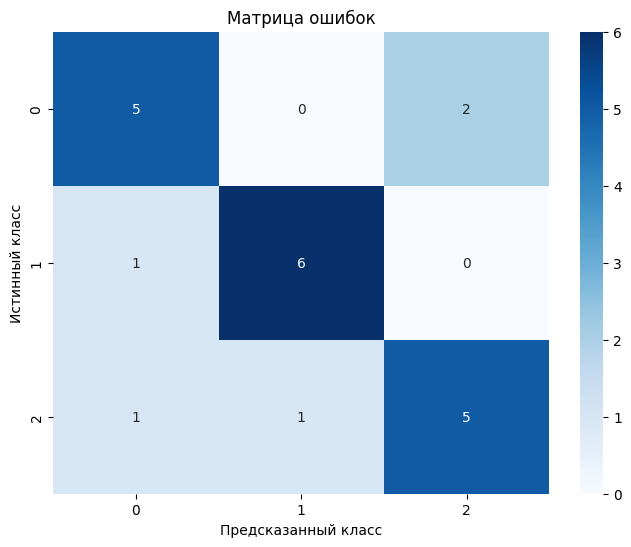

In [197]:
# Необходимо нормализовать данные той же моделью scaler
X_test_scaled = scaler.transform(X_test)

# Визуализация матрицы ошибок
matrix_confusion(model, X_test_scaled, y_test)

In [198]:
# Загружаем функцию
from classmuseeg.model_operations import optimize_model_sgd

# Пример вызова функции оптимизации модели SGDClassifier (максимизация валидационной точности), возращающей scaler для последующего применения для предсказаний и лучшую модель
model, scaler = optimize_model_sgd(X_train, X_val, X_test, y_train, y_val, y_test, 100)

[I 2025-05-20 01:12:11,010] A new study created in memory with name: SGDClassifier_Optimization
[I 2025-05-20 01:12:11,184] Trial 2 finished with value: 0.8571428571428571 and parameters: {'loss': 'hinge', 'alpha': 1.7528141371868106e-05, 'max_iter': 2000, 'tol': 0.0005366267668582575, 'learning_rate': 'constant', 'penalty': 'l1', 'early_stopping': True, 'eta0': 0.011269266292217882}. Best is trial 2 with value: 0.8571428571428571.
[I 2025-05-20 01:12:11,211] Trial 1 finished with value: 0.7142857142857143 and parameters: {'loss': 'log_loss', 'alpha': 1.4395245290875228e-05, 'max_iter': 8000, 'tol': 0.0004664277660165578, 'learning_rate': 'constant', 'penalty': 'l2', 'early_stopping': True, 'eta0': 0.0010238867558798434}. Best is trial 2 with value: 0.8571428571428571.


Запуск оптимизации гиперпараметров с Optuna...


[I 2025-05-20 01:12:11,236] Trial 5 finished with value: 0.8095238095238095 and parameters: {'loss': 'perceptron', 'alpha': 0.004146302548592611, 'max_iter': 10000, 'tol': 0.0009898824013019414, 'learning_rate': 'constant', 'penalty': 'l2', 'early_stopping': False, 'eta0': 0.00834978319448577}. Best is trial 2 with value: 0.8571428571428571.
[I 2025-05-20 01:12:11,314] Trial 6 finished with value: 0.8571428571428571 and parameters: {'loss': 'log_loss', 'alpha': 0.0003038669944288244, 'max_iter': 5000, 'tol': 0.0005092464732901409, 'learning_rate': 'invscaling', 'penalty': 'elasticnet', 'early_stopping': False, 'eta0': 0.04153532634688682}. Best is trial 2 with value: 0.8571428571428571.
[I 2025-05-20 01:12:11,323] Trial 4 finished with value: 0.8095238095238095 and parameters: {'loss': 'squared_hinge', 'alpha': 5.6161962142044205e-05, 'max_iter': 1000, 'tol': 0.002536697146760036, 'learning_rate': 'constant', 'penalty': 'l1', 'early_stopping': True, 'eta0': 0.08286486231380998}. Best i


Лучшие параметры, найденные Optuna: {'loss': 'log_loss', 'alpha': 6.920268449760684e-05, 'max_iter': 4000, 'tol': 0.001377595413999073, 'learning_rate': 'optimal', 'penalty': 'l2', 'early_stopping': False}

Обучение финальной модели с лучшими параметрами...

Отчет по классификации на валидационной выборке (с лучшей моделью, обученной на X_train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.86      0.92         7
           2       0.88      1.00      0.93         7

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21


Отчет по классификации на тестовой выборке:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.57      0.57      0.57         7
           2       0.44      0.57      0.50         7

    ac

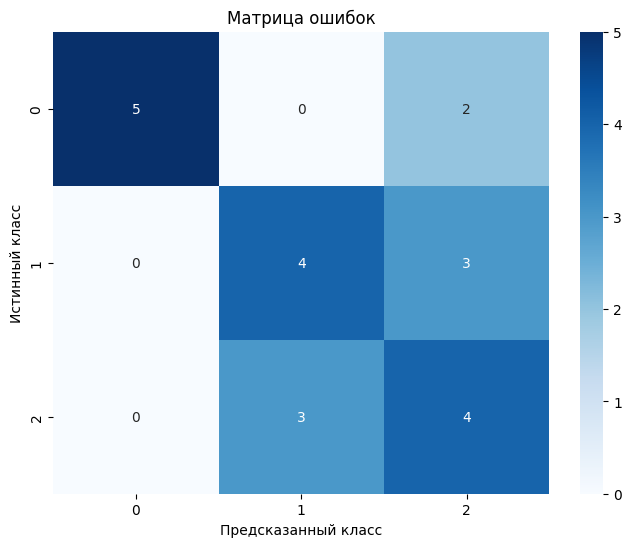

In [199]:
# Необходимо нормализовать данные той же моделью scaler
X_test_scaled = scaler.transform(X_test)

# Визуализация матрицы ошибок
matrix_confusion(model, X_test_scaled, y_test)

# **Предсказание на предобученной модели**

In [200]:
# Загрузка библиотеки
!pip install git+https://github.com/AskerNagoev/ClassMusEEG.git

  Cloning https://github.com/AskerNagoev/ClassMusEEG.git to /tmp/pip-req-build-jwbiu16x
  Running command git clone --filter=blob:none --quiet https://github.com/AskerNagoev/ClassMusEEG.git /tmp/pip-req-build-jwbiu16x
  Resolved https://github.com/AskerNagoev/ClassMusEEG.git to commit 30b8ee4ce6047bfebff50aae5f12b82f38f5693d
  Preparing metadata (setup.py) ... done


In [201]:
# Подключение библиотеки
import classmuseeg

In [241]:
# Загружаем функцию
from classmuseeg.data_preprocessing import organize

sub_num = 1 # Номер субъекта
stim_num = 1 # Номер стимула
trial_num = 1 # Номер пробы
channels = ["T7", "FT7", "T8", "FT8"] # Список каналов

# Берем данные с 4 стимулом - 1-й класс
data = '/kaggle/input/classmuseeg/Sub5_Stim3_Trial2.csv' # Файл с записью ЭЭГ, может иметь любое название

# Организуем в подходящую для функций структуру данных
new_dict = organize(sub_num, stim_num, trial_num, data, channels)

Данные для Sub1_Stim1_Trial1 с выбранными каналами загружены.


In [242]:
# Загружаем функцию
from classmuseeg.data_preprocessing import timeframe

# Указываем частоту дискретизации данных (в данном случае 512 Гц)
sampling_rate = 512

# Время начала фрагмента, который нужно извлечь, в секундах
start_time_sec = 5 

# Время конца фрагмента, который нужно извлечь, в секундах
end_time_sec = 35

# Функция возвращает новый набор данных, ограниченный указанным интервалом времени
new_dict_timeframed = timeframe(new_dict, sampling_rate, start_time_sec, end_time_sec)

Данные для Sub1_Stim1_Trial1 успешно извлечены и добавлены в новый словарь.


In [243]:
# Загружаем функцию
from classmuseeg.data_preprocessing import bandpass_filter

# Устанавливаем низкочастотный порог фильтра (в данном случае 1.0 Гц)
lowcut = 1.0

# Устанавливаем высокочастотный порог фильтра (в данном случае 7.0 Гц)
highcut = 7.0

# Частота дискретизации данных (в данном случае 512 Гц)
fs = 512

# Порядок фильтра (определяет, насколько круто фильтр будет отсекать частоты за пределами заданного диапазона)
order = 4

# Функция возвращает данные, обработанные полосовым фильтром
new_dict_filtered = bandpass_filter(new_dict_timeframed, lowcut, highcut, fs, order)

Полосовой фильтр применен к записи Sub1_Stim1_Trial1.


In [244]:
# Загружаем функцию
from classmuseeg.feature_extraction import moving_window

# Устанавливаем параметры для скользящего окна
window_size_sec = 0.5  # Размер окна в секундах (0.5 сек)
overlap_size_sec = 0.25  # Размер перекрытия между окнами (0.25 сек)
sampling_rate = 512  # Частота дискретизации (512 Гц)

# Функция возвращает данные, разделенные на окна с указанным перекрытием
windowed_new_dict = moving_window(new_dict_filtered, window_size_sec, overlap_size_sec, sampling_rate)

Скользящее окно применено к Sub1_Stim1_Trial1. Результат: 119 окон.


In [245]:
import joblib
from tensorflow.keras.models import load_model

# Указываем путь к директории, где находятся данные
data_dir = "/kaggle/workplace/"

# Загрузка scaler из файла
scaler_recreated = joblib.load('scaler_model_bilstm.pkl')

# Загрузка предобученной модели Bi-LSTM
model_recreated = load_model('model_bilstm.h5')

In [246]:
# Использование загруженного scaler для преобразования данных
Y_scaled = scaler_recreated.transform(windowed_new_dict['Sub1_Stim1_Trial1'])

# Добавляем размерность для батча (предположим, что у нас 1 пример)
Y_scaled_reshaped = np.reshape(Y_scaled, (1, Y_scaled.shape[0], Y_scaled.shape[1]))

In [247]:
np.argmax(model_recreated.predict(Y_scaled_reshaped), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


array([1])